# QF 627 Programming and Computational Finance
## Lesson 01 | Revisit NumPy, Pandas, & Matplotlib (feat. `bokeh` & `seaborn`) | `xzj`view

> Now that you are sufficinetly familiar with the basics of data cleaning and analysis in pandas, we're going to take it up a notch. 

> Previously, the datasets were in relatively clean and straightforward formats. 

> However, in many cases, the data you analyze can be extremely messy and difficult to manage.

> That's why we're going to practice with a more unweildy. 

> You'll notice that it's quite a big file – about 1.7 million rows! 

> These are reports from accidents in New Jersey between 2008 and 2013 from the New Jersey Department of Transportation. 

> The data was scraped from [PDFs of crash reports](http://www.state.nj.us/transportation/refdata/accident/) filled out by clerk.

### Import pandas and let's load in our new and very messy data

In [1]:
import pandas as pd

In [2]:
insurance = pd.read_csv("accidents.csv") # encoding = "ISO-8859-1"

D:\Downloads\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


> You may notice that you get this warning.

`"DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False. interactivity=interactivity, compiler=compiler, result=result)"`

> This dtype error happens when when a column has both strings and integer values. 

> You can ignore this for now because we'll fix it soon. Open up the first few rows of our dataframe.

In [3]:
insurance.head()

,case code,County Name,Municipality Name,Crash Date,Crash Day Of Week,Crash Time,Police Dept Code,Police Department,Police Station,Total Killed,...,Is Ramp,Ramp To/From Route Name,Ramp To/From Route Direction,Posted Speed,Posted Speed Cross Street,Latitude,Longitude,Cell Phone In Use Flag,Other Property Damage,Reporting Badge No.
0,2008010108-026816,ATLANTIC,ABSECON CITY,3/4/08,TU,1539,1,ATLANTIC CITY,AIU,0,...,,,,50,,39.41158,74.49162,N,NONE ...,384
1,2008010108-163190,ATLANTIC,ABSECON CITY,12/19/08,F,1114,1,ATLANTIC CITY,TRAFFIC,0,...,,,,50,,39.39231,74.48952,N,NONE ...,739
2,2008010108-24779,ATLANTIC,ABSECON CITY,11/25/08,TU,345,99,NJ TRANSIT P.D.,ATLANTIC CITY,0,...,,,,10,25,,,N,? ...,53
3,2008010108-3901,ATLANTIC,ABSECON CITY,3/31/08,M,105,1,EAST WINDSOR,TRAFFIC UNIT,0,...,,,,0,,,,N,NONE ...,551
4,2008010108-5016,ATLANTIC,ABSECON CITY,1/25/08,F,942,1,EGG HARBOR TWP,HQ,0,...,,,,50,40,39.43036,74.52469,N,NONE ...,1571


> Let's found out what we're working with, and get the column headers for all of the columns.

In [4]:
insurance.columns

Index(['case code', ' County Name', ' Municipality Name', ' Crash Date',
       ' Crash Day Of Week', ' Crash Time', ' Police Dept Code',
       ' Police Department', ' Police Station', ' Total Killed',
       ' Total Injured', ' Pedestrians Killed', ' Pedestrians Injured',
       ' Severity', ' Intersection', ' Alcohol Involved', ' HazMat Involved',
       ' Crash Type Code', ' Total Vehicles Involved', ' Crash Location',
       ' Location Direction', ' Route', ' Route Suffix',
       ' SRI (Std Rte Identifier)', ' MilePost  ', ' Road System',
       ' Road Character', ' Road Surface Type', ' Surface Condition',
       ' Light Condition', ' Environmental Condition', ' Road Divided By',
       ' Temporary Traffic Control Zone', ' Distance To Cross Street',
       ' Unit Of Measurement', ' Directn From Cross Street',
       ' Cross Street Name', ' Is Ramp', ' Ramp To/From Route Name',
       ' Ramp To/From Route Direction', ' Posted Speed',
       ' Posted Speed Cross Street', ' Latitud

> Bummer. There's our first problem. Notice that there's a leading space in every column header. We should take it out.

In [3]:
insurance.rename(columns = lambda x: x.strip(), inplace = True)

> Remember where we renamed the columns in our dataframe previously? 

> This time, we're using the same rename function to do take out all of the leading spaces using `strip()`. 

> Pythonistas will notice that we're using the `lambda python` to apply `strip()` to every single column header.

In [4]:
insurance.columns

Index(['case code', 'County Name', 'Municipality Name', 'Crash Date',
       'Crash Day Of Week', 'Crash Time', 'Police Dept Code',
       'Police Department', 'Police Station', 'Total Killed', 'Total Injured',
       'Pedestrians Killed', 'Pedestrians Injured', 'Severity', 'Intersection',
       'Alcohol Involved', 'HazMat Involved', 'Crash Type Code',
       'Total Vehicles Involved', 'Crash Location', 'Location Direction',
       'Route', 'Route Suffix', 'SRI (Std Rte Identifier)', 'MilePost',
       'Road System', 'Road Character', 'Road Surface Type',
       'Surface Condition', 'Light Condition', 'Environmental Condition',
       'Road Divided By', 'Temporary Traffic Control Zone',
       'Distance To Cross Street', 'Unit Of Measurement',
       'Directn From Cross Street', 'Cross Street Name', 'Is Ramp',
       'Ramp To/From Route Name', 'Ramp To/From Route Direction',
       'Posted Speed', 'Posted Speed Cross Street', 'Latitude', 'Longitude',
       'Cell Phone In Use Flag', '

> Good job :)

> Let's describe() the dataframe.

In [5]:
insurance.describe()

,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Total Vehicles Involved,Road System,Posted Speed
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.965525e-03,3.119510e-01,4.854207e-04,1.735117e-02,1.875997e+00,5.199488e+00,3.120711e+01
std,4.694568e-02,7.015340e-01,2.211335e-02,1.344480e-01,5.416507e-01,2.491480e+00,1.790289e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.500000e+01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,2.500000e+01
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,4.500000e+01
max,5.000000e+00,4.200000e+01,2.000000e+00,1.000000e+01,2.000000e+01,1.000000e+01,9.900000e+01


> But let's see if we could describe() a column. Let's use the describe() function for the `County Name` column header.

In [6]:
insurance["County Name"].describe()

count          1048575
unique              21
top       MIDDLESEX   
freq            115760
Name: County Name, dtype: object

> So there are 21 unique values in the `County Name` column (for the 21 counties in New Jersey). 

> We can see that the top county with the most rows is Middlesex County with 176,402 crashes. 

> What are the names of the counties in New Jersey? Let's find out by using the unique() function on our `County Name` column.

In [7]:
insurance["County Name"].unique()

array(['ATLANTIC    ', 'BERGEN      ', 'BURLINGTON  ', 'CAMDEN      ',
       'CAPE MAY    ', 'CUMBERLAND  ', 'ESSEX       ', 'GLOUCESTER  ',
       'HUDSON      ', 'HUNTERDON   ', 'MERCER      ', 'MIDDLESEX   ',
       'MONMOUTH    ', 'MORRIS      ', 'OCEAN       ', 'PASSAIC     ',
       'SALEM       ', 'SOMERSET    ', 'SUSSEX      ', 'UNION       ',
       'WARREN      '], dtype=object)

> Looks like we're going to need to strip out the spaces out of the these county values. 

> This time we'll use the `map()` function which will strip the white space out of every string found in the column.

In [8]:
insurance["County Name"] = insurance["County Name"].map(str.strip)

In [9]:
insurance["County Name"].unique()

array(['ATLANTIC', 'BERGEN', 'BURLINGTON', 'CAMDEN', 'CAPE MAY',
       'CUMBERLAND', 'ESSEX', 'GLOUCESTER', 'HUDSON', 'HUNTERDON',
       'MERCER', 'MIDDLESEX', 'MONMOUTH', 'MORRIS', 'OCEAN', 'PASSAIC',
       'SALEM', 'SOMERSET', 'SUSSEX', 'UNION', 'WARREN'], dtype=object)

> Good :) Speaking of strings, let's fix that dtype error we got at the beginning of the exercise. 

> Type in dtypes at the end of our dataframe.

In [10]:
insurance.dtypes

case code                         object
County Name                       object
Municipality Name                 object
Crash Date                        object
Crash Day Of Week                 object
Crash Time                        object
Police Dept Code                  object
Police Department                 object
Police Station                    object
Total Killed                       int64
Total Injured                      int64
Pedestrians Killed                 int64
Pedestrians Injured                int64
Severity                          object
Intersection                      object
Alcohol Involved                  object
HazMat Involved                   object
Crash Type Code                   object
Total Vehicles Involved            int64
Crash Location                    object
Location Direction                object
Route                             object
Route Suffix                      object
SRI (Std Rte Identifier)          object
MilePost        

> This shows us the type of data type object (or dtypes) the values of every column are. Objects refer to strings. `Int64` are integers. `Float64` are floats.

> The `warning at the beginning` said it was column 6 that had mixed dtypes. If you look at your column list and count to the sixth column (Remember to count from zero!), you'll see that it's the `Police Dept Code` column. Let's look at every unique value in that column.

In [13]:
insurance["Police Dept Code"].unique()

array(['1', '99', '  ', '2', '3', '4', 1, 99, 2, 3, 4], dtype=object)

> And there it is! As you can see, there are strings and integers mixed together in the same column.

In [14]:
insurance["Police Dept Code"] = insurance["Police Dept Code"].astype(str)

> Same for column 17 or the `Crash Type Code` column. 

> Let's fix that by changing every value in both columns to a string using the `astype()` function.

> We're changing it to a string because we don't need to do math with these numbers since they are codes so it's more beneficial to use them as objects. 

> If you wanted to change something to an integer or a float, you'll need to use astype(int) and astype(float) respectively.

In [15]:
insurance["Police Dept Code"].unique()

array(['1', '99', '  ', '2', '3', '4'], dtype=object)

> That took care of that :)

> Let's make our dataframe a little bit more manageable by weeding out some unnecessary columns. 

> Let's also create a new dataframe called `crash_info`.

In [16]:
crash_info = insurance[["County Name", "Municipality Name", "Crash Date",
               "Crash Day Of Week", "Crash Time", "Total Killed",
               "Total Injured", "Pedestrians Killed", "Pedestrians Injured",
               "Total Vehicles Involved", "Alcohol Involved", "Cell Phone In Use Flag"]]

In [17]:
crash_info

,County Name,Municipality Name,Crash Date,Crash Day Of Week,Crash Time,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Total Vehicles Involved,Alcohol Involved,Cell Phone In Use Flag
0,ATLANTIC,ABSECON CITY,3/4/08,TU,1539,0,0,0,0,2,N,N
1,ATLANTIC,ABSECON CITY,12/19/08,F,1114,0,0,0,0,2,N,N
2,ATLANTIC,ABSECON CITY,11/25/08,TU,345,0,0,0,0,2,N,N
3,ATLANTIC,ABSECON CITY,3/31/08,M,105,0,0,0,0,2,N,N
4,ATLANTIC,ABSECON CITY,1/25/08,F,942,0,1,0,0,2,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,MIDDLESEX,WOODBRIDGE TWP,7/21/11,TH,1611,0,0,0,0,1,N,N
1048571,MIDDLESEX,WOODBRIDGE TWP,7/21/11,TH,1723,0,0,0,0,2,N,N
1048572,MIDDLESEX,WOODBRIDGE TWP,7/21/11,TH,1821,0,0,0,0,2,N,N
1048573,MIDDLESEX,WOODBRIDGE TWP,7/22/11,F,733,0,0,0,0,2,N,N


### How many car accidents had alcohol involved?

Let's find out the unique values that come up in the column `Alcohol Involved`.

In [18]:
crash_info["Alcohol Involved"].unique()

array(['N', 'Y'], dtype=object)

> We have only two unique values in the column: `N` for `no` and `Y` for `yes`.

> Let's find out how many incidents had Ns and how many had Ys. 

> We're going to use the function value_counts() on the column 'Alcohol Involved'. 

> We're also going to put the list in a new dataframe called `alcohol` so that it will look nicer in our notebook.

In [19]:
ALCOHOL = pd.DataFrame(insurance["Alcohol Involved"].value_counts())
ALCOHOL

,Alcohol Involved
N,1017766
Y,30809


> A lot more Ns than Ys. But just what percentage are the Ys compared to the Ns? 

> First, let's get the total number of crashes in our data frame.

In [20]:
total_counts_of_crash = crash_info["Alcohol Involved"].count()

In [21]:
total_counts_of_crash

1048575

> `Be careful`. 

> The `count()` function doesn't count `NAs` or `null` values. 

> Always make sure to check for those using the `isnull()` function, followed by `sum()`

In [22]:
crash_info["Alcohol Involved"].isnull().sum() == 0

True

> Let's create a new column named `Percent` and divide every value of the `Alcohol Involved` column by the total crashes from the `crash_count` we created above and then multiply by 100.

In [23]:
ALCOHOL["Percent"] = (ALCOHOL["Alcohol Involved"]) / total_counts_of_crash * 100
ALCOHOL

,Alcohol Involved,Percent
N,1017766,97.061822
Y,30809,2.938178


> Mystery solved. Only 2.9 percent.

### How many total people were killed in every county?

> Let's first use the `value_counts()` function to find out how many accidents were reported in each county.

In [24]:
crash_info.head()

,County Name,Municipality Name,Crash Date,Crash Day Of Week,Crash Time,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Total Vehicles Involved,Alcohol Involved,Cell Phone In Use Flag
0,ATLANTIC,ABSECON CITY,3/4/08,TU,1539,0,0,0,0,2,N,N
1,ATLANTIC,ABSECON CITY,12/19/08,F,1114,0,0,0,0,2,N,N
2,ATLANTIC,ABSECON CITY,11/25/08,TU,345,0,0,0,0,2,N,N
3,ATLANTIC,ABSECON CITY,3/31/08,M,105,0,0,0,0,2,N,N
4,ATLANTIC,ABSECON CITY,1/25/08,F,942,0,1,0,0,2,N,N


In [25]:
crash_info["County Name"].value_counts()

MIDDLESEX     115760
ESSEX         112580
BERGEN        112521
HUDSON         78693
CAMDEN         64739
MONMOUTH       64637
UNION          59556
PASSAIC        56494
MERCER         55008
OCEAN          53104
MORRIS         49096
BURLINGTON     45010
SOMERSET       36621
ATLANTIC       35130
GLOUCESTER     31940
CUMBERLAND     18876
HUNTERDON      16441
CAPE MAY       13198
SUSSEX         12587
WARREN         11123
SALEM           5461
Name: County Name, dtype: int64

> So let's split up every incident that happened in every county by using the `groupby()`

In [26]:
crash_info.groupby("County Name")

> That looks like it did nothing, but it actually DID split up the counties into their own seperate groups. 

> We just need to know perform an action. 

> If you notice, there are columns like `Total Killed`, `Total Injured`, `Pedestrians Killed`, etc. that have numbers or integers that can be summed up. 

> Basically, we're going to add them all up by using the `sum()` function and make it into a new dataframe called `county_crash`.

In [27]:
county_crash = crash_info.groupby("County Name").sum()
county_crash

,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Total Vehicles Involved
County Name,,,,,
ATLANTIC,117,13518,23,728,64147
BERGEN,101,31706,42,2136,215278
BURLINGTON,161,15285,28,398,81956
CAMDEN,173,24909,45,1102,122872
CAPE MAY,32,4206,1,172,23761
CUMBERLAND,99,7296,9,226,33571
ESSEX,170,39627,63,3511,216820
GLOUCESTER,102,11442,17,342,57627
HUDSON,87,19842,32,2675,154819


> Well, that's grim. 

> Let's just take out the `Total Killed` column using `iloc` which asks what data we should slice by putting an integer based on its position. 

> The first value represents the rows and is separated by comma from the second value which represents the columns. 

> Therefore, if we want all of the rows, we put a colon. We then seperate using a comma. Then, because `Total Killed` is the first column, we can slice it by putting in a zero. 

> We will also sort it by using `sort_values` and adding the option `ascending=False` because we want the values to descend. 

> Let's make it into a new dataframe called county_death.

In [28]:
county_death = crash_info.groupby("County Name").sum().iloc[:,0].sort_values(ascending = False)
county_death

County Name
MIDDLESEX     182
CAMDEN        173
ESSEX         170
BURLINGTON    161
OCEAN         160
MONMOUTH      131
ATLANTIC      117
UNION         110
GLOUCESTER    102
BERGEN        101
CUMBERLAND     99
HUDSON         87
MERCER         85
PASSAIC        75
MORRIS         72
SOMERSET       60
HUNTERDON      40
SALEM          40
SUSSEX         35
CAPE MAY       32
WARREN         29
Name: Total Killed, dtype: int64

> What would be the `type` of `county_death`?

In [29]:
type(county_death)

pandas.core.series.Series

# Let's make `county_death` into a dataframe.

In [30]:
pd.DataFrame(county_death)

,Total Killed
County Name,
MIDDLESEX,182
CAMDEN,173
ESSEX,170
BURLINGTON,161
OCEAN,160
MONMOUTH,131
ATLANTIC,117
UNION,110
GLOUCESTER,102


### What about dates?

In [31]:
crash_info.dtypes

County Name                object
Municipality Name          object
Crash Date                 object
Crash Day Of Week          object
Crash Time                 object
Total Killed                int64
Total Injured               int64
Pedestrians Killed          int64
Pedestrians Injured         int64
Total Vehicles Involved     int64
Alcohol Involved           object
Cell Phone In Use Flag     object
dtype: object

In [32]:
crash_info.sample(4)

,County Name,Municipality Name,Crash Date,Crash Day Of Week,Crash Time,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Total Vehicles Involved,Alcohol Involved,Cell Phone In Use Flag
282356,UNION,ELIZABETH CITY,10/18/08,SA,608,0,0,0,0,2,N,N
144993,MERCER,EWING TWP,8/31/08,S,1422,0,0,0,0,2,N,N
128774,HUDSON,JERSEY CITY,12/31/08,W,1128,0,1,0,1,1,N,N
1020142,MERCER,TRENTON CITY,5/5/11,TH,1222,0,0,0,0,2,N,N


> You may have noticed that the dates on the `Crash Date` are strings and not Python date objects. 

> This will be inconvenient because if you sort them you'll get '01/01/2008, 01/01/2009, 01/01/2010' etc. 

> We want them to sort by date correctly, and in order to do that, we need to turn them into the Python date format.

> ***We will need to `import datetime` first.*** 

In [33]:
from datetime import datetime 

> Then we will use `apply()` along with the `lambda` function to turn every string in that column into the format "%m/%d/%Y".

In [34]:
crash_info["Crash Date"] = crash_info["Crash Date"].apply(lambda x: datetime.strptime(x, "%m/%d/%y").date())

<ipython-input-34-211e59c3d91c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_info["Crash Date"] = crash_info["Crash Date"].apply(lambda x: datetime.strptime(x, "%m/%d/%y").date())


> Now we're ready to `groupby()` the `Crash Date` column every date in our dataframe and count how many accidents happened every day. 

> And then we will slice the first column which is how many crashes happened each day using iloc. (Colon for all rows, comma, then 0 for the first column)

In [35]:
crash_info["Crash Date"]

0          2008-03-04
1          2008-12-19
2          2008-11-25
3          2008-03-31
4          2008-01-25
              ...    
1048570    2011-07-21
1048571    2011-07-21
1048572    2011-07-21
1048573    2011-07-22
1048574    2011-07-22
Name: Crash Date, Length: 1048575, dtype: object

In [36]:
crash_date = crash_info.groupby("Crash Date").count().iloc[:,0]
crash_date

Crash Date
2008-01-01    575
2008-01-02    716
2008-01-03    830
2008-01-04    906
2008-01-05    674
             ... 
2011-12-27    589
2011-12-28    369
2011-12-29    429
2011-12-30    483
2011-12-31    335
Name: County Name, Length: 1461, dtype: int64

> Now let's sort.

In [37]:
crash_date.sort_values(ascending = False)

Crash Date
2008-02-12    3050
2010-01-28    2180
2010-12-26    2017
2008-12-19    1995
2008-02-22    1893
              ... 
2011-09-11     264
2011-02-27     260
2011-03-13     241
2011-12-25     207
2011-08-28     195
Name: County Name, Length: 1461, dtype: int64

Looks like on [February 12, 2008 was a busy day for New Jersey](https://www.weather.gov/media/phi/StormReports/February12-132008.pdf) with 3,050 accidents reported to happen that day.

> Let's now save the following dataframes into csv.

In [38]:
crash_date.to_csv("line_chart.csv")
county_death.to_csv("bar_plot.csv")
county_crash.to_csv("scatter_with_regression_line.csv")

In [39]:
bar = pd.read_csv("bar_plot.csv")
scatter_reg = pd.read_csv("scatter_with_regression_line.csv")
line = pd.read_csv("line_chart.csv")

> Another great feature of using python analysis in the Jupyter notebook is the ability to visualize the data using the [Bokeh visualization library](http://bokeh.pydata.org/en/latest/). 

> We won't go into great detail on the step-by-step process of creating beautiful graphics in your notebook, but you can see what's possible below. 

> You can read more documentation on Bokeh [here](http://bokeh.pydata.org/en/latest/docs/user_guide.html#userguide)

In [40]:
%pip install bokeh

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [41]:
# bokeh for interactivity
# seaborn for performing statistical modelling information

from bokeh.plotting import output_file, output_notebook, show, figure
from bokeh.models import HoverTool

#### Let's upload the datasets we'll use which we created above.

In [42]:
bar

,County Name,Total Killed
0,MIDDLESEX,182
1,CAMDEN,173
2,ESSEX,170
3,BURLINGTON,161
4,OCEAN,160
5,MONMOUTH,131
6,ATLANTIC,117
7,UNION,110
8,GLOUCESTER,102
9,BERGEN,101


### `Bar plot`

> Let's have a look at `Total Killed` in **each county**

In [43]:
output_notebook()

County = bar["County Name"]

barplot = figure(title = "Total Death by County",
                 plot_width = 500,
                 plot_height = 400,
                 tools = "",
                 toolbar_location = None,
                 x_range = County)

barplot.vbar(top = "Total Killed",
             x = "County Name",
             width = 0.75,
             source = bar) # input you DF here

barplot.xgrid.grid_line_color = None
barplot.xaxis.major_label_orientation = "vertical"
barplot.y_range.start = 0

output_file("Your_First_Bokeh_Barplot.html")

show(barplot)

Loading BokehJS ...

### `Scatter plot`

> Let's take a look at the relationships between `Total Killed` and `Pedestrians Killed in each county`.

In [44]:
scatter_reg

,County Name,Total Killed,Total Injured,Pedestrians Killed,Pedestrians Injured,Total Vehicles Involved
0,ATLANTIC,117,13518,23,728,64147
1,BERGEN,101,31706,42,2136,215278
2,BURLINGTON,161,15285,28,398,81956
3,CAMDEN,173,24909,45,1102,122872
4,CAPE MAY,32,4206,1,172,23761
5,CUMBERLAND,99,7296,9,226,33571
6,ESSEX,170,39627,63,3511,216820
7,GLOUCESTER,102,11442,17,342,57627
8,HUDSON,87,19842,32,2675,154819
9,HUNTERDON,40,3997,9,59,27295


> You might want to create a regression line :)

> As you will learn more down the line in the course, you can use library `seaborn`.  

> `seaborn` is a Python data visualization library based on `matplotlib`. 

> It provides a high-level interface for drawing attractive and informative statistical graphics.

In [45]:
scatter = figure (title = "Relationships between Total Death and Pedestrians Killed in Each County",
                 x_axis_label = "Total Death",
                 y_axis_label = "Pedestrians Killed")

scatter.circle("Total Killed",
               "Pedestrians Killed",
               source = scatter_reg) # INPUT your DF here

output_file("Your_First_Bokeh_Scatter.html")

show(scatter)


In [46]:
%pip install seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simpleNote: you may need to restart the kernel to use updated packages.



In [47]:
import seaborn as sns

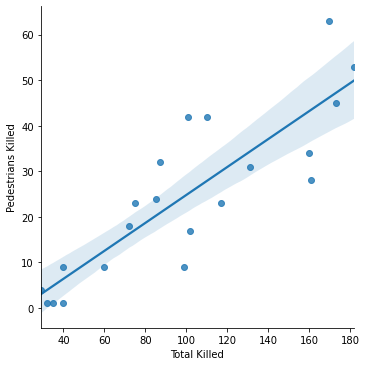

In [48]:
sns.lmplot(y = "Pedestrians Killed",
           x ="Total Killed",
           data = scatter_reg)

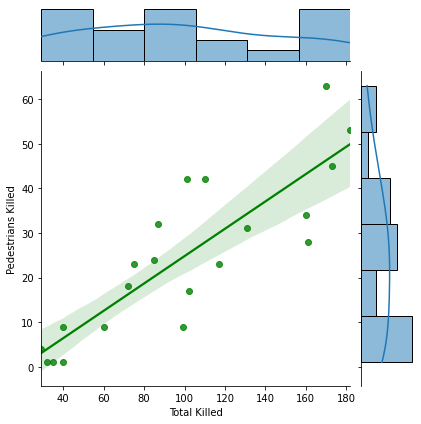

In [105]:
#### jointplot() gives you distribution of your X and Y variables

import matplotlib.pyplot as plt

sns.jointplot(y = "Pedestrians Killed", x = "Total Killed", data = scatter_reg,
              kind = "reg",
              joint_kws = {"color": "green"}
              )

### `Line Chart`

> Let's see the number of New Jersey car crashes over time (2008-2013)

In [50]:
line["Crash Date"] = pd.to_datetime(line["Crash Date"]).sort_values(ascending = True)

In [51]:
line

,Crash Date,County Name
0,2008-01-01,575
1,2008-01-02,716
2,2008-01-03,830
3,2008-01-04,906
4,2008-01-05,674
...,...,...
1456,2011-12-27,589
1457,2011-12-28,369
1458,2011-12-29,429
1459,2011-12-30,483


In [52]:
linechart = figure(title = "N. of NJ Car Accidents over time",
                   plot_width = 500,
                   plot_height = 400,
                   x_axis_type = "datetime")

linechart.line(line["Crash Date"].sort_values(),
               line["County Name"],
               line_color = "red", 
               line_width = 1)

linechart.xaxis.major_label_orientation = "vertical"
linechart.xaxis.axis_label = "Crash Date"
linechart.yaxis.axis_label = "N. of Car Accidents"

output_file("Your_First_TimeSeries_Line.html")

show(linechart)

> `Thank you for working with the script :)`

# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise 1 | `Questions`

> For your further exercise, let's analyze a dataset about [TED talks](https://www.ted.com/talks) using `pandas` and `matplotlib` libraries.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### <font color = "blue"> `IMPORT` your dataset: `TED_talks.csv`. </font>

In [2]:
exercise1 = pd.read_csv("TED_talks.csv")

> #### Print the imported dataframe. Each row (data points) represents a single talk (unit of observation).

In [3]:
exercise1.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### Question 1. How would you check the number of rows and columns?

In [4]:
exercise1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

> Note that `object columns` are usually `strings`, but can also be arbitrary Python objects such as `lists` and `dictionaries`.

> #### <font color = "red"> See **Chapter 12 and 13** of `The Coder's Apprentice` for more details. </font>

### Question 2. How would you count the number of missing values in each column?

In [5]:
exercise1.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [6]:
# 看看哪几行值缺失
exercise1[exercise1.isna().any(axis = 1)]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1113,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,1310601600,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,1326731605,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,1331424000,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,1333289675,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,257,"As you surf the Web, information is being coll...",399,TED2012,1330473600,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,1336057219,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,1383091200,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,1389369735,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,1415059200,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,1423238442,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,1413763200,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,1427989423,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431


### Question 3.1. Which talks give rise to the most online discussion? First, please sort by the number of first-level comments (though note that this is `biased in favor of older talks`).

In [7]:
exercise1[exercise1["comments"] == exercise1["comments"].max()]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [8]:
exercise1.sort_values(by = "comments", ascending = False)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,5,Grammy-winning Silk Road Ensemble display thei...,389,TED2016,1455494400,0,Silk Road Ensemble,"Silk Road Ensemble: ""Turceasca""",1,1489759215,"[{'id': 1, 'name': 'Beautiful', 'count': 80}, ...","[{'id': 2611, 'hero': 'https://pe.tedcdn.com/i...",Musical explorers,"['art', 'live music', 'music', 'performance']","""Turceasca""",https://www.ted.com/talks/silk_road_ensemble_t...,640734
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,1501770244,"[{'id': 7, 'name': 'Funny', 'count': 10}, {'id...","[{'id': 2479, 'hero': 'https://pe.tedcdn.com/i...",Art editor,"['TEDNYC', 'art', 'creativity', 'culture', 'de...",The stories behind The New Yorker's iconic covers,https://www.ted.

#### Question 3.2. Please `correct for the bias` in favor of older talks `by calculating the number of comments per view`.

In [9]:
exercise1["comments per view"] = exercise1["comments"] / exercise1["views"]
exercise1.sort_values(by = "comments per view", ascending = False)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments per view
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,1492992000,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,1500994384,"[{'id': 1, 'name': 'Beautiful', 'count': 7}, {...","[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,1501770244,"[{'id': 7, 'name': 'Funny', 'count': 10}, {'id...","[{'id': 2479, 'hero': 'https://pe.tedcdn.com/i...",Art edito

> #### You will find that, for every view of the same-sex marriage talk, there are 0.002 comments.

#### Question 3.3. Please make this more interpretable by `inverting` the calculation.

In [10]:
exercise1["view per comments"] = exercise1["views"] / exercise1["comments"]
exercise1.sort_values(by = "view per comments")

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments per view,view per comments
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,1492992000,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,1500994384,"[{'id': 1, 'name': 'Beautiful', 'count': 7}, {...","[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007,143643.714286
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006,179735.666667
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006,180696.000000
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,15017

> Please consider the `limitations` and `biases` of your data, making your results understandable (`interpretable`).

### <font color = "blue"> Let's `visualize` the distribution of comments </font>

> #### <font color = "red"> See **Chapter 4** of `Python Data Science Handbook` for a quick reference for matplotlib </font>

> #### <font color = "red"> For in-depth details, use https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html </font>

#### Question 3.4. Please create a `Line chart`, but it seems NOT useful here.

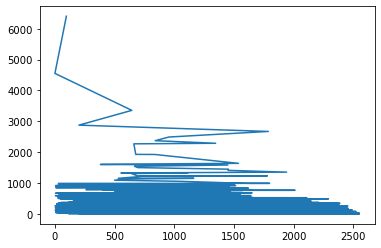

In [11]:
comments = exercise1["comments"].sort_values()

plt.plot(comments)
plt.show()

#### Question 3.5. Please create a `Histogram`--it displays the frequency distribution of a single numeric variable.

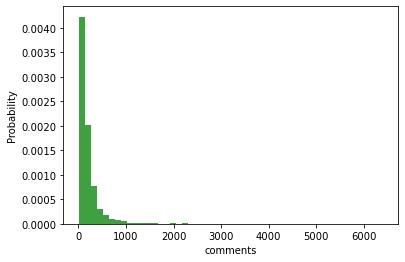

In [12]:
plt.hist(comments,50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('comments')
plt.ylabel('Probability')
plt.show()

#### Question 3.6. Please modify the plot to be more informative by setting a cut-off for inclusion (i.e., more than 1,000 comments).

In [13]:
sub_comments = comments[comments <= 1000]
sub_comments

2534       2
2542       3
2528       3
2501       3
2407       5
        ... 
29       970
30       991
1798     992
1632     992
1533    1000
Name: comments, Length: 2519, dtype: int64

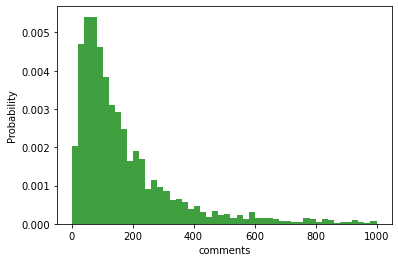

In [14]:
plt.hist(sub_comments,50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('comments')
plt.ylabel('Probability')
plt.show()

>  Now, before we move on, let's check how many observations we removed from the plot.

In [15]:
len(comments) - len(sub_comments) + 1

32

In [16]:
exercise1[exercise1["comments"] >= 1000].shape

(32, 19)

### Question 4.1. Here's a question for an expansion of your vocabulary: please obtain the above using the query method.

> #### <font color = "red"> Please check the following for more details </font> 
> - `Python Data Science Handbook`
    - *Chapter 3*: Data Manipulation with Pandas
        - *Section 12*: High-Performance Pandas: `eval()` and `query()` 

In [17]:
second_sub_comments = exercise1.query("comments <= 1000")["comments"]
second_sub_comments

1       265
2       124
3       200
4       593
5       672
       ... 
2545     17
2546      6
2547     10
2548     32
2549      8
Name: comments, Length: 2519, dtype: int64

#### Question 4.2. Here's a question for yet another expansion of your vocabulary: please write this using the `loc` accessor.

> #### <font color = "red"> Please check the following for more details on the differences between loc and iloc. 
    
> - `** NOTE: You may ignore ix as it has been deprecated**` </font>

> - `Python Data Science Handbook`
    - *Chapter 3*: Data Manipulation with Pandas
        - *Section 2*: Data Indexing and Selection
            - *Subsection 3*: Indexers: loc, iloc, and ix

In [18]:
third_sub_comments = exercise1.loc[exercise1["comments"] <= 1000, ["comments"]]
third_sub_comments

,comments
1,265
2,124
3,200
4,593
5,672
...,...
2545,17
2546,6
2547,10
2548,32


> Let's increase the number of bins (intervals) to see more detail.

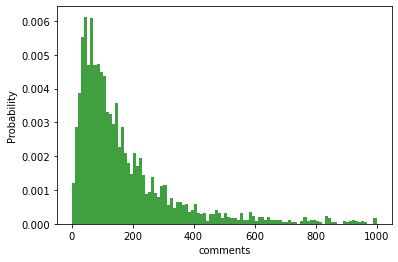

In [19]:
plt.hist(third_sub_comments,100, density=True, facecolor='g', alpha=0.75)

plt.xlabel('comments')
plt.ylabel('Probability')
plt.show()

#### Question 4.3. Please create a boxplot. Boxplot can also show distributions, but it's far less useful for concentrated distributions because of outliers.

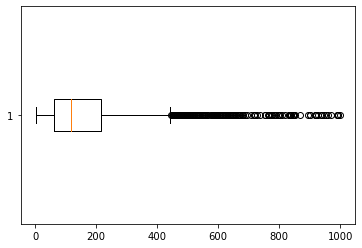

In [20]:
plt.boxplot(third_sub_comments, vert = False)

plt.show()

![](微信图片_20210831213127.png)

### <font color = "blue"> Let me reiterate learning pointers in an explicit manner so that you can keep this in mind. </font>

1. `Choose your plot type` based on the question you are answering and the data type(s) you are working with
2. `Use pandas one-liners` to iterate through plots quickly
3. `Try modifying the plot defaults`

> ***Yes, creating plots involves your decision-making***

#### Question 4.4. Please plot the number of talks that took place each year.

> Let's calculate the average delay between filming and publishing.

In [21]:
import datetime as dt
exercise1.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments per view,view per comments
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443


In [24]:
exercise1["film_date"] = pd.to_datetime(exercise1["film_date"], unit = "s")

In [25]:
exercise1["published_date"] = pd.to_datetime(exercise1["published_date"], unit = "s")
exercise1.tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments per view,view per comments
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,2017-09-19 20:00:16,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,0.000038,26495.882353
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,2017-09-20 15:02:17,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,0.000014,69578.333333
2547,10,Science fiction visions of the future show us ...,651,TED2017,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,2017-09-21 15:01:35,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,0.000027,37564.700000
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,2017-07-08,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,2017-09-21 20:00:42,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,0.000076,13103.406250
2549,8,With more than half of the world population li...,519,TED2017,2017-04-24,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,2017-09-22 15:00:22,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,0.000020,48965.125000


In [26]:
delay = (exercise1["published_date"]-exercise1["film_date"]).dt.days

delay.mean()

249.45960784313726

> Okay. `event` column does not always include the year

> Note that `film_date` denotes `Unix timestamp of the filming`. Have a look at it :)

> Results don't look right...

> What would you do? You may use `to_datetime()`

> Still, it does NOT look fine...

### <font color = "red"> For your information, [pandas documentation for `to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) </font>

> #### <font color = "blue"> Please use argument `unit` and set it at `"s"` </font>

In [30]:
exercise1["film_datetime"] = pd.to_datetime(exercise1["film_date"], unit = "s")

> You might want to check that event name matches film_datetime for a random sample: use, `sample()`

In [31]:
exercise1.sample(n = 4)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments per view,view per comments,film_datetime
2133,38,How much do you know about intellectual disabi...,852,TEDxVancouver,2015-11-14,24,Matthew Williams,Matthew Williams: Special Olympics let me be m...,1,2016-02-05 15:53:55,"[{'id': 3, 'name': 'Courageous', 'count': 281}...","[{'id': 769, 'hero': 'https://pe.tedcdn.com/im...",Special Olympics International Sargent Shriver...,"['TEDx', 'bullying', 'community', 'disability'...",Special Olympics let me be myself -- a champion,https://www.ted.com/talks/matthew_williams_spe...,1074684,0.000035,28281.157895,2015-11-14
855,98,"Your medical chart: it's hard to access, impos...",993,TEDMED 2010,2010-10-10,27,Thomas Goetz,Thomas Goetz: It's time to redesign medical data,1,2011-01-25 15:58:07,"[{'id': 8, 'name': 'Informative', 'count': 392...","[{'id': 966, 'hero': 'https://pe.tedcdn.com/im...",Healthcare communicator,"['business', 'design', 'health', 'medicine', '...",It's time to redesign medical data,https://www.ted.com/talks/thomas_goetz_it_s_ti...,497626,0.000197,5077.816327,2010-10-10
2263,11,"With warmth and respect, Gonzalo Vilariño tell...",859,TEDxRiodelaPlata,2015-09-24,18,Gonzalo Vilariño,Gonzalo Vilariño: How Argentina's blind soccer...,1,2016-08-19 14:14:35,"[{'id': 1, 'name': 'Beautiful', 'count': 129},...","[{'id': 2186, 'hero': 'https://pe.tedcdn.com/i...","Lawyer, coach","['Blindness', 'TED en Español', 'TEDx', 'colla...",How Argentina's blind soccer team became champ...,https://www.ted.com/talks/gonzalo_vilarino_how...,443773,0.000025,40343.000000,2015-09-24
2108,44,"For sculptor Jason deCaires Taylor, the ocean ...",669,Mission Blue II,2015-10-10,30,Jason deCaires Taylor,Jason deCaires Taylor: An underwater art museu...,1,2015-12-22 16:33:01,"[{'id': 1, 'name': 'Beautiful', 'count': 492},...","[{'id': 2160, 'hero': 'https://pe.tedcdn.com/i...",Sculptor,"['art', 'creativity', 'design', 'ecology', 'en...","An underwater art museum, teeming with life",https://www.ted.com/talks/jason_decaires_taylo...,1446673,0.000030,32878.931818,2015-10-10


> New column uses the datetime data type (this was an automatic conversion)

##### `datetime` columns have convenient attributes under the `dt` namespace

In [32]:
exercise1.film_datetime.dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

> This is similar to string methods under the `str` namespace

In [33]:
exercise1.event.str.lower()

0            ted2006
1            ted2006
2            ted2006
3            ted2006
4            ted2006
            ...     
2545         ted2017
2546         ted2017
2547         ted2017
2548    tedxmilehigh
2549         ted2017
Name: event, Length: 2550, dtype: object

> Let's count the number of talks each year using value_counts()

In [35]:
count_talk = exercise1["film_date"].dt.year.value_counts()
count_talk

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1984      1
1983      1
1991      1
1994      1
1990      1
1972      1
Name: film_date, dtype: int64

##### Let's visualize.

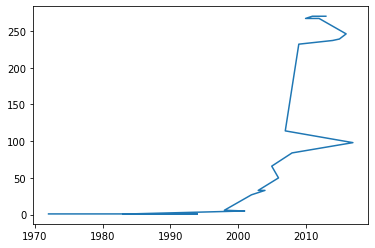

In [36]:
plt.plot(count_talk)

> points are plotted and connected in the order you give them to pandas

#### Question 4.5. Please sort the index before plotting

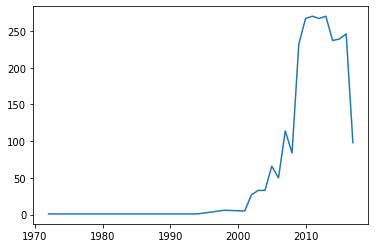

In [37]:
count_talk = exercise1["film_date"].dt.year.value_counts().sort_index()
plt.plot(count_talk)

> Check your data to understand more about what this means :)

In [38]:
exercise1.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

> Do note that we only have partial data for 2017

Before we move forward, please consider the following:

- Read the documentation of your dataset
- Use the datetime data type for dates and times
- Check your work as you proceed
- Exclude data if it might not be relevant to your focal point of analysis

### Question 5.1. What were the "best" events in TED talks' history to attend? Let's count the number of talks (great if you value variety, but they may not be great talks)

In [39]:
exercise1["event"].value_counts()

TED2014                   84
TED2009                   83
TED2016                   77
TED2013                   77
TED2015                   75
                          ..
TEDxVirginiaTech           1
TEDSalon London 2009       1
TEDxLinnaeusUniversity     1
TEDxCannes                 1
TEDxPittsburgh             1
Name: event, Length: 355, dtype: int64

#### Question 5.2. Let's use `views` as a proxy for `quality of talk`

In [40]:
exercise1["views"]

0       47227110
1        3200520
2        1636292
3        1697550
4       12005869
          ...   
2545      450430
2546      417470
2547      375647
2548      419309
2549      391721
Name: views, Length: 2550, dtype: int64

#### Question 5.3. Let's find the largest values, but we don't know how many talks are being averaged

In [41]:
exercise1.groupby("event")["views"].mean().sort_values()

event
The Do Lectures             112321.0
TEDxIslay                   120274.0
TEDxWaterloo                138812.0
AORN Congress               149818.0
TEDxNASA@SiliconValley      155895.0
                             ...    
TEDxNorrkoping             6569493.0
TEDxCreativeCoast          8444981.0
TEDxBloomington            9484259.5
TEDxHouston               16140250.5
TEDxPuget Sound           34309432.0
Name: views, Length: 355, dtype: float64

#### Question 5.4. Let's show the number of talks along with the mean (events with the highest means had only 1 or 2 talks)

In [42]:
exercise1.groupby("event").views.agg(["count","mean"]).sort_values("mean")

,count,mean
event,,
The Do Lectures,1,112321.0
TEDxIslay,1,120274.0
TEDxWaterloo,1,138812.0
AORN Congress,1,149818.0
TEDxNASA@SiliconValley,1,155895.0
...,...,...
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5


#### Question 5.5. Let's calculate the total views per event

In [43]:
exercise1.groupby("event").views.agg(["count","mean", "sum"]).sort_values("sum")

,count,mean,sum
event,,,
The Do Lectures,1,1.123210e+05,112321
TEDxIslay,1,1.202740e+05,120274
TEDxWaterloo,1,1.388120e+05,138812
AORN Congress,1,1.498180e+05,149818
TEDxNASA@SiliconValley,1,1.558950e+05,155895
...,...,...,...
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736


> #### <font color = "blue"> As you have seen, please... </font>

- Think creatively for how you can use the data you have to answer your question
- Watch out for small sample sizes

### Now, let's take a look at ratings data

> Previously, users could tag talks on the TED website (funny, inspiring, confusing, etc.)

In [44]:
exercise1.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments per view,view per comments,film_datetime
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443,2006-02-25


> Think about `two ways` to examine the ratings data for the first talk

In [45]:
exercise1.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [46]:
exercise1.loc[0, "ratings"]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

> Okay, this is a string not a list.

In [48]:
type(exercise1.ratings[0])

str

### Let's convert this into something useful using Python's `ast` module (`Abstract Syntax Tree`)

> `literal_eval()` allows you to evaluate a string containing a Python literal or container

> #### <font color = "red"> See below for my guidance </font>

In [49]:
import ast

```python
# if you wish to unpack data
    YOUR_DF["variable"].apply(ast.literal_eval)

# if you wish to access specific talk related data
    YOUR_DF["variable"].apply(ast.literal_eval)[0]

# if you wish to access specific talk related observations within the data
    YOUR_DF["variable"].apply(ast.literal_eval)[0][0]

# if you wish to access specific talk related observations with a particular attribute within the data
    YOUR_DF["variable"].apply(ast.literal_eval)[0][0]["key"]
```

> If you have a string representation of something, you can retrieve what it actually represents

In [50]:
ast.literal_eval(exercise1.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

> Let's unpack the ratings data for the first talk

In [51]:
type(ast.literal_eval(exercise1.ratings[0]))

list

> Yes, now we have a list (of dictionaries)

### Question 6. Let's define a function to convert an element in the ratings Series from string to list

#### <font color = "blue"> USE `ast.literal_eval()` </font>

In [52]:
def string_to_list(rating_str):
    return ast.literal_eval(rating_str)

> Let's test our function

In [53]:
exercise1["ratings"][0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [54]:
string_to_list(exercise1["ratings"][0]) # 第一组字节转成list

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

> Note that Series `apply` method applies a function to every element in a Series, returning a Series.

In [55]:
exercise1.ratings.apply(string_to_list)[0] # 很多组list选第一组list

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

> #### <font color = "blue"> `lambda` is a shorter alternative</blue>

> #### <font color = "red">Please check the following for more details</font>
> - `Coder's Apprentice`
    - *Chapter 8*: Functions
        - *Section 6*: Anonymous functions

In [56]:
exercise1["ratings_list"] = exercise1.ratings.apply(lambda x: ast.literal_eval(x))
exercise1["ratings_list"]

0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
                              ...                        
2545    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2546    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2548    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2549    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings_list, Length: 2550, dtype: object

> An even shorter alternative is to apply the function directly (without lambda)

In [58]:
type(exercise1["ratings_list"][0])

list

> Let's check that the new Series looks as expected

In [59]:
exercise1["ratings_list"][0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

> Each element in the Series is a list

> data type of the new Series is object

##### Note that object is not just for strings.

In [60]:
exercise1.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date             datetime64[ns]
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date        datetime64[ns]
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments per view            float64
view per comments            float64
film_datetime         datetime64[ns]
ratings_list                  object
dtype: object

#### <font color = "blue"> So far so good, remember to: </font>

- Pay attention to data types in pandas
- Use apply any time it is necessary

### Question 7.1. Let's have a look at the total number of ratings received by each talk

- for each talk, calculate the percentage of ratings that were negative

- for each talk, calculate the average number of ratings it received per day since it was published

> Let's start by building a simple function

> Here, expected result (for each talk) is sum of count

In [61]:
def extract_number_of_ratings(list_of_dicts):
    return list_of_dicts[0]

#### Question 7.2. Please pass it a list, and it returns the first element in the list, which is a dictionary

In [62]:
extract_number_of_ratings(exercise1.ratings_list[0])

{'id': 7, 'name': 'Funny', 'count': 19645}

#### Question 7.3. Let's modify the function to return the vote count.

In [63]:
## method 1 def function
def extract_number_of_ratings(list_of_dicts):
    return list_of_dicts[0]["count"]

#### Quesion 7.4. Let's pass it a list, and it returns a value from the first dictionary in the list

In [64]:
## method 1 def function
extract_number_of_ratings(exercise1.ratings_list[0])

19645

#### Question 7.5. Let's modify the function to get the sum of count

In [65]:
## method 1 def function
def extract_number_of_ratings(list_of_dicts):
    count = 0
    for d in list_of_dicts:
        count = count + d["count"]
    
    return count

> Does the result look about right? Please check.

In [66]:
## method 1 def function
extract_number_of_ratings(exercise1.ratings_list[0])

93850

> Let's apply it to every element in the Series

In [67]:
exercise1.ratings_list.apply(extract_number_of_ratings) # dataframe里每行都 分别 用这个函数

0       93850
1        2936
2        2824
3        3728
4       25620
        ...  
2545      192
2546      151
2547      136
2548      583
2549      142
Name: ratings_list, Length: 2550, dtype: int64

> #### <font color = "blue"> Alternative here is to use a `generator expression`</font>

> #### <font color = "red"> Please check the following for more details </font>
> - `Think Python`: https://greenteapress.com/thinkpython2/thinkpython2.pdf
    - *Chapter 19*: The Goodies
        - *Section 3*: Generator expressions

In [68]:
sum(i["count"] for i in exercise1.ratings_list[0])

93850

> Try to use `lambda` to apply this method

In [69]:
exercise1.ratings_list.apply(lambda x: sum(d["count"] for d in x))

0       93850
1        2936
2        2824
3        3728
4       25620
        ...  
2545      192
2546      151
2547      136
2548      583
2549      142
Name: ratings_list, Length: 2550, dtype: int64

> Another alternative is to use `pd.DataFrame()`

In [70]:
pd.DataFrame(exercise1.ratings_list[0])["count"].sum()

93850

> use `lambda` to apply this method

In [71]:
exercise1.ratings_list.apply(lambda x: pd.DataFrame(x)["count"].sum())

0       93850
1        2936
2        2824
3        3728
4       25620
        ...  
2545      192
2546      151
2547      136
2548      583
2549      142
Name: ratings_list, Length: 2550, dtype: int64

> Things to consider:

- Write your code in small chunks

- Check your work as you move forward

- `lambda` is best for simple functions

In [78]:
exercise1["number_of_ratings"] = exercise1.ratings_list.apply(extract_number_of_ratings)
exercise1.sample(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,comments per view,view per comments,film_datetime,ratings_list,number_of_ratings
2471,65,"A few days before she turned 61, writer Anne L...",955,TED2017,2017-04-24,16,Anne Lamott,Anne Lamott: 12 truths I learned from life and...,1,2017-06-09 15:06:36,...,"Novelist, essayist","['Christianity', 'God', 'aging', 'art', 'beaut...",12 truths I learned from life and writing,https://www.ted.com/talks/anne_lamott_12_truth...,1890978,0.000034,29091.969231,2017-04-24,"[{'id': 26, 'name': 'Obnoxious', 'count': 27},...",2057


### Let's find: 
#### ***which occupations deliver the funniest TED talks on average?***

- for each talk, calculate the most frequent rating
- for each talk, clean the occupation data so that there's only one occupation per talk

##### You might want to count the number of funny ratings

In [74]:
exercise1.ratings_list.head(1)

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
Name: ratings_list, dtype: object

> "Funny" is not always the first dictionary in the list.

#### Please check ratings (not ratings_list) to see if "Funny" is always a rating type

In [75]:
exercise1.ratings.str.contains("Funny").value_counts()

True    2550
Name: ratings, dtype: int64

### Question 8. Let's write a custom function that gives us a `dictionary` that lists `talks` containing `funny` rating.

In [76]:
def extract_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d["name"] == "Funny":
            return d["count"]

> Then, you might want to examine a record in which "Funny" is not the first dictionary

In [79]:
exercise1.ratings_list[96]

[{'id': 3, 'name': 'Courageous', 'count': 3236},
 {'id': 21, 'name': 'Unconvincing', 'count': 539},
 {'id': 1, 'name': 'Beautiful', 'count': 399},
 {'id': 2, 'name': 'Confusing', 'count': 86},
 {'id': 7, 'name': 'Funny', 'count': 1203},
 {'id': 9, 'name': 'Ingenious', 'count': 663},
 {'id': 11, 'name': 'Longwinded', 'count': 192},
 {'id': 8, 'name': 'Informative', 'count': 1113},
 {'id': 10, 'name': 'Inspiring', 'count': 2935},
 {'id': 22, 'name': 'Fascinating', 'count': 934},
 {'id': 24, 'name': 'Persuasive', 'count': 2475},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 551},
 {'id': 26, 'name': 'Obnoxious', 'count': 406},
 {'id': 25, 'name': 'OK', 'count': 172}]

> Let's check that the function works.

In [80]:
extract_funny_ratings(exercise1.ratings_list[96])

1203

> Let's apply it to every element in the Series.

In [81]:
exercise1.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,comments per view,view per comments,film_datetime,ratings_list,number_of_ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,...,Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",93850


In [82]:
exercise1["funny_ratings"] = exercise1.ratings_list.apply(extract_funny_ratings)

> Do check for `missing values`.

In [83]:
exercise1.funny_ratings.isna().sum()

0

##### Now, let's calculate the percentage of ratings that are funny

In [84]:
exercise1["funny_percentage"] = exercise1.funny_ratings / exercise1.number_of_ratings

> Let's do some "gut check" here that this calculation makes sense by examining the occupations of the funniest talks

In [85]:
exercise1.sort_values("funny_percentage").speaker_occupation

2549                  Game designer
1612                      Biologist
612                        Sculptor
998                  Penguin expert
593                        Engineer
                   ...             
2114            Comedian and writer
173                        Investor
747                        Comedian
1398                       Comedian
685     Actor, comedian, playwright
Name: speaker_occupation, Length: 2550, dtype: object

> Let's examine the occupations of the least funny talks.

In [90]:
exercise1.groupby("speaker_occupation").funny_percentage.mean().sort_values().head()

speaker_occupation
 Chairman of the Cordoba Initiative    0.0
Political scientist and journalist     0.0
HIV/AIDS fighter                       0.0
Author, thinker                        0.0
Aid worker                             0.0
Name: funny_percentage, dtype: float64

### Question 9. It would be funny (pun inteded here) to analyze the funny rate by occupation :) Let's calculate the mean funny rate for each job.

In [89]:
exercise1.groupby("speaker_occupation").funny_percentage.mean().sort_values().tail()

speaker_occupation
Comedian                       0.512457
Actor, writer                  0.515152
Actor, comedian, playwright    0.558107
Jugglers                       0.566828
Comedian and writer            0.602085
Name: funny_percentage, dtype: float64

##### Note that most of the occupations have a sample size of 1

In [91]:
exercise1.speaker_occupation.value_counts()

Writer                                                                    45
Designer                                                                  34
Artist                                                                    34
Journalist                                                                33
Entrepreneur                                                              31
                                                                          ..
Principal Investigator and Director of the Open Agriculture Initiative     1
Cybercrime fighter                                                         1
Designer and storyteller                                                   1
Human beatbox                                                              1
Farmer and technologist                                                    1
Name: speaker_occupation, Length: 1458, dtype: int64

### Question 10. Let's start looking at `occupations` that are well-represented in the dataset. Let's count how many times each job appears

In [92]:
counting_jobs = exercise1.speaker_occupation.value_counts()
counting_jobs

Writer                                                                    45
Designer                                                                  34
Artist                                                                    34
Journalist                                                                33
Entrepreneur                                                              31
                                                                          ..
Principal Investigator and Director of the Open Agriculture Initiative     1
Cybercrime fighter                                                         1
Designer and storyteller                                                   1
Human beatbox                                                              1
Farmer and technologist                                                    1
Name: speaker_occupation, Length: 1458, dtype: int64

##### `value_counts()` outputs a pandas Series, thus we can use pandas to manipulate the output

In [93]:
type(counting_jobs)

pandas.core.series.Series

##### Let's take a look at jobs which appear at least 5 times

In [94]:
counting_jobs[counting_jobs>=5]

Writer                        45
Designer                      34
Artist                        34
Journalist                    33
Entrepreneur                  31
                              ..
Chemist                        5
Paleontologist                 5
Environmentalist, futurist     5
Producer                       5
Game designer                  5
Name: speaker_occupation, Length: 68, dtype: int64

> Let's save the index of this Series

In [95]:
well_represented_jobs = counting_jobs[counting_jobs>=5].index
well_represented_jobs

Index(['Writer', 'Designer', 'Artist', 'Journalist', 'Entrepreneur',
       'Architect', 'Inventor', 'Psychologist', 'Photographer', 'Filmmaker',
       'Economist', 'Author', 'Educator', 'Neuroscientist', 'Roboticist',
       'Philosopher', 'Biologist', 'Physicist', 'Marine biologist', 'Musician',
       'Technologist', 'Global health expert; data visionary', 'Activist',
       'Graphic designer', 'Behavioral economist', 'Philanthropist',
       'Astronomer', 'Singer/songwriter', 'Poet', 'Oceanographer', 'Historian',
       'Social psychologist', 'Computer scientist', 'Novelist', 'Futurist',
       'Engineer', 'Mathematician', 'Astrophysicist', 'Social entrepreneur',
       'Legal activist', 'Reporter', 'Performance poet, multimedia artist',
       'Photojournalist', 'Evolutionary biologist', 'Singer-songwriter',
       'Writer, activist', 'Techno-illusionist', 'Climate advocate',
       'Comedian', 'Researcher', 'Social Media Theorist',
       'Investor and advocate for moral leaders

##### Now, re-analyze the funny rate by occupation (for top jobs only)

> Let's filter DataFrame to include only those jobs.

In [96]:
ted_with_jobs = exercise1[exercise1.speaker_occupation.isin(well_represented_jobs)]
ted_with_jobs

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,title,url,views,comments per view,view per comments,film_datetime,ratings_list,number_of_ratings,funny_ratings,funny_percentage
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,...,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",2936,544,0.185286
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,...,The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,20245.984823,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",25620,1390,0.054254
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,2006-02-23,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,2006-07-10 00:11:00,...,Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741,0.000048,21037.847826,2006-02-23,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...",1024,9,0.008789
11,55,Jehane Noujaim unveils her 2006 TED Prize wish...,1538,TED2006,2006-02-26,20,Jehane Noujaim,Jehane Noujaim: My wish: A global day of film,1,2006-07-25 00:11:00,...,My wish: A global day of film,https://www.ted.com/talks/jehane_noujaim_inspi...,387877,0.000142,7052.309091,2006-02-26,"[{'id': 1, 'name': 'Beautiful', 'count': 70}, ...",592,5,0.008446
14,99,"Nicholas Negroponte, founder of the MIT Media ...",1057,TED2006,2006-02-23,25,Nicholas Negroponte,Nicholas Negroponte: One Laptop per Child,1,2006-08-01 00:11:00,...,One Laptop per Child,https://www.ted.com/talks/nicholas_negroponte_...,358304,0.000276,3619.232323,2006-02-23,"[{'id': 3, 'name': 'Courageous', 'count': 83},...",781,14,0.017926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,10,"Forget quinoa. Meet fonio, an ancient ""miracle...",934,TED2017,2017-08-27,2,Pierre Thiam,Pierre Thiam: A forgotten ancient grain that c...,1,2017-09-13 14:45:42,...,A forgotten ancient grain that could help Afri...,https://www.ted.com/talks/pierre_thiam_a_forgo...,527314,0.000019,52731.400000,2017-08-27,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...",256,2,0.007812
2541,12,Physics doesn't just happen in a fancy lab -- ...,957,TEDxManchester,2017-02-19,2,Helen Czerski,Helen Czerski: The fascinating physics of ever...,1,2017-09-14 20:00:02,...,The fascinating physics of everyday life,https://www.ted.com/talks/helen_czerski_fun_ho...,656791,0.000018,54732.583333,2017-02-19,"[{'id': 11, 'name': 'Longwinded', 'count': 29}...",378,39,0.103175
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,2017-08-27,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,2017-09-15 15:08:13,...,Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006,180696.000000,2017-08-27,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...",181,6,0.033149
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,2017-09-19 20:00:16,...,What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,0.000038,26495.882353,2017-06-06,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",192,1,0.005208


##### Let's re-do the previous groupby

In [97]:
exercise1.groupby("speaker_occupation").funny_percentage.mean().sort_values()

speaker_occupation
 Chairman of the Cordoba Initiative    0.000000
Political scientist and journalist     0.000000
HIV/AIDS fighter                       0.000000
Author, thinker                        0.000000
Aid worker                             0.000000
                                         ...   
Comedian                               0.512457
Actor, writer                          0.515152
Actor, comedian, playwright            0.558107
Jugglers                               0.566828
Comedian and writer                    0.602085
Name: funny_percentage, Length: 1458, dtype: float64

> ### <font color = "blue"> Please consider the following, when using `pandas`: </font>

- Check your assumptions about your data
- Check whether your results are reasonable
- Take advantage of the fact that pandas operations often output a DataFrame or a Series
- Watch out for small sample sizes
- Consider the impact of missing data

> ### <font color = "blue"> As you could find from me as well as from the dataset, `data scientists are relatively funny` :) </font>


### <font color="green">"Thank you for putting your efforts into the exercise problem sets :)"</font>

# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise 1 | `Questions`

> For your further exercise, let's analyze a dataset about [TED talks](https://www.ted.com/talks) using `pandas` and `matplotlib` libraries.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### <font color = "blue"> `IMPORT` your dataset: `TED_talks.csv`. </font>

In [2]:
exercise1 = pd.read_csv("TED_talks.csv")

> #### Print the imported dataframe. Each row (data points) represents a single talk (unit of observation).

In [3]:
exercise1.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### Question 1. How would you check the number of rows and columns?

In [4]:
exercise1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

> Note that `object columns` are usually `strings`, but can also be arbitrary Python objects such as `lists` and `dictionaries`.

> #### <font color = "red"> See **Chapter 12 and 13** of `The Coder's Apprentice` for more details. </font>

### Question 2. How would you count the number of missing values in each column?

In [5]:
exercise1.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [6]:
# 看看哪几行值缺失
exercise1[exercise1.isna().any(axis = 1)]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1113,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,1310601600,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,1326731605,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,1331424000,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,1333289675,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,257,"As you surf the Web, information is being coll...",399,TED2012,1330473600,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,1336057219,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,1383091200,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,1389369735,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,1415059200,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,1423238442,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,1413763200,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,1427989423,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431


### Question 3.1. Which talks give rise to the most online discussion? First, please sort by the number of first-level comments (though note that this is `biased in favor of older talks`).

In [7]:
exercise1[exercise1["comments"] == exercise1["comments"].max()]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [8]:
exercise1.sort_values(by = "comments", ascending = False)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,5,Grammy-winning Silk Road Ensemble display thei...,389,TED2016,1455494400,0,Silk Road Ensemble,"Silk Road Ensemble: ""Turceasca""",1,1489759215,"[{'id': 1, 'name': 'Beautiful', 'count': 80}, ...","[{'id': 2611, 'hero': 'https://pe.tedcdn.com/i...",Musical explorers,"['art', 'live music', 'music', 'performance']","""Turceasca""",https://www.ted.com/talks/silk_road_ensemble_t...,640734
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,1501770244,"[{'id': 7, 'name': 'Funny', 'count': 10}, {'id...","[{'id': 2479, 'hero': 'https://pe.tedcdn.com/i...",Art editor,"['TEDNYC', 'art', 'creativity', 'culture', 'de...",The stories behind The New Yorker's iconic covers,https://www.ted.

#### Question 3.2. Please `correct for the bias` in favor of older talks `by calculating the number of comments per view`.

In [9]:
exercise1["comments per view"] = exercise1["comments"] / exercise1["views"]
exercise1.sort_values(by = "comments per view", ascending = False)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments per view
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,1492992000,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,1500994384,"[{'id': 1, 'name': 'Beautiful', 'count': 7}, {...","[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,1501770244,"[{'id': 7, 'name': 'Funny', 'count': 10}, {'id...","[{'id': 2479, 'hero': 'https://pe.tedcdn.com/i...",Art edito

> #### You will find that, for every view of the same-sex marriage talk, there are 0.002 comments.

#### Question 3.3. Please make this more interpretable by `inverting` the calculation.

In [10]:
exercise1["view per comments"] = exercise1["views"] / exercise1["comments"]
exercise1.sort_values(by = "view per comments")

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments per view,view per comments
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7,Jimmy Lin is developing technologies to catch ...,730,TED2017,1492992000,10,Jimmy Lin,Jimmy Lin: A simple new blood test that can ca...,1,1500994384,"[{'id': 1, 'name': 'Beautiful', 'count': 7}, {...","[{'id': 2498, 'hero': 'https://pe.tedcdn.com/i...",Geneticist,"['DNA', 'TED Fellows', 'biology', 'cancer', 'd...",A simple new blood test that can catch cancer ...,https://www.ted.com/talks/jimmy_lin_a_simple_n...,1005506,0.000007,143643.714286
2528,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,1465344000,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,1504209631,"[{'id': 9, 'name': 'Ingenious', 'count': 16}, ...","[{'id': 2673, 'hero': 'https://pe.tedcdn.com/i...",Digital archaeologist,"['TEDx', 'ancient world', 'archaeology', 'cons...",How your pictures can help reclaim lost history,https://www.ted.com/talks/chance_coughenour_ho...,539207,0.000006,179735.666667
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,1503792000,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,1505488093,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Artist,"['Africa', 'activism', 'art', 'community', 'hi...",Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006,180696.000000
2501,3,"Meet Françoise Mouly, The New Yorker's art dir...",509,TEDNYC,1488931200,12,Françoise Mouly,Françoise Mouly: The stories behind The New Yo...,1,15017

> Please consider the `limitations` and `biases` of your data, making your results understandable (`interpretable`).

### <font color = "blue"> Let's `visualize` the distribution of comments </font>

> #### <font color = "red"> See **Chapter 4** of `Python Data Science Handbook` for a quick reference for matplotlib </font>

> #### <font color = "red"> For in-depth details, use https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html </font>

#### Question 3.4. Please create a `Line chart`, but it seems NOT useful here.

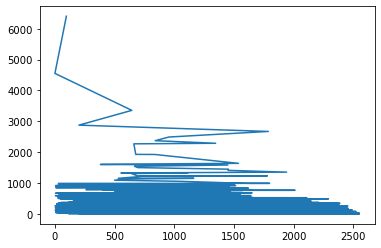

In [11]:
comments = exercise1["comments"].sort_values()

plt.plot(comments)
plt.show()

#### Question 3.5. Please create a `Histogram`--it displays the frequency distribution of a single numeric variable.

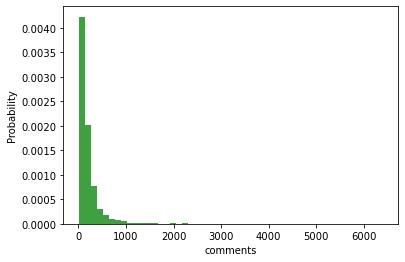

In [12]:
plt.hist(comments,50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('comments')
plt.ylabel('Probability')
plt.show()

#### Question 3.6. Please modify the plot to be more informative by setting a cut-off for inclusion (i.e., more than 1,000 comments).

In [13]:
sub_comments = comments[comments <= 1000]
sub_comments

2534       2
2542       3
2528       3
2501       3
2407       5
        ... 
29       970
30       991
1798     992
1632     992
1533    1000
Name: comments, Length: 2519, dtype: int64

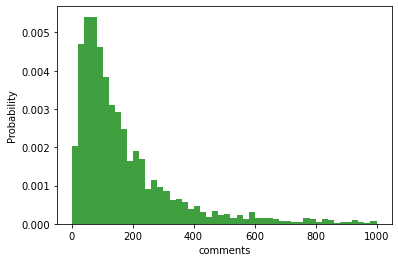

In [14]:
plt.hist(sub_comments,50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('comments')
plt.ylabel('Probability')
plt.show()

>  Now, before we move on, let's check how many observations we removed from the plot.

In [15]:
len(comments) - len(sub_comments) + 1

32

In [16]:
exercise1[exercise1["comments"] >= 1000].shape

(32, 19)

### Question 4.1. Here's a question for an expansion of your vocabulary: please obtain the above using the query method.

> #### <font color = "red"> Please check the following for more details </font> 
> - `Python Data Science Handbook`
    - *Chapter 3*: Data Manipulation with Pandas
        - *Section 12*: High-Performance Pandas: `eval()` and `query()` 

In [17]:
second_sub_comments = exercise1.query("comments <= 1000")["comments"]
second_sub_comments

1       265
2       124
3       200
4       593
5       672
       ... 
2545     17
2546      6
2547     10
2548     32
2549      8
Name: comments, Length: 2519, dtype: int64

#### Question 4.2. Here's a question for yet another expansion of your vocabulary: please write this using the `loc` accessor.

> #### <font color = "red"> Please check the following for more details on the differences between loc and iloc. 
    
> - `** NOTE: You may ignore ix as it has been deprecated**` </font>

> - `Python Data Science Handbook`
    - *Chapter 3*: Data Manipulation with Pandas
        - *Section 2*: Data Indexing and Selection
            - *Subsection 3*: Indexers: loc, iloc, and ix

In [18]:
third_sub_comments = exercise1.loc[exercise1["comments"] <= 1000, ["comments"]]
third_sub_comments

,comments
1,265
2,124
3,200
4,593
5,672
...,...
2545,17
2546,6
2547,10
2548,32


> Let's increase the number of bins (intervals) to see more detail.

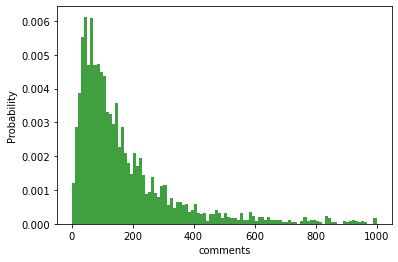

In [19]:
plt.hist(third_sub_comments,100, density=True, facecolor='g', alpha=0.75)

plt.xlabel('comments')
plt.ylabel('Probability')
plt.show()

#### Question 4.3. Please create a boxplot. Boxplot can also show distributions, but it's far less useful for concentrated distributions because of outliers.

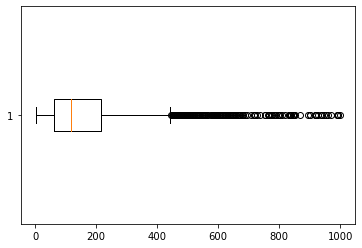

In [20]:
plt.boxplot(third_sub_comments, vert = False)

plt.show()

![](微信图片_20210831213127.png)

### <font color = "blue"> Let me reiterate learning pointers in an explicit manner so that you can keep this in mind. </font>

1. `Choose your plot type` based on the question you are answering and the data type(s) you are working with
2. `Use pandas one-liners` to iterate through plots quickly
3. `Try modifying the plot defaults`

> ***Yes, creating plots involves your decision-making***

#### Question 4.4. Please plot the number of talks that took place each year.

> Let's calculate the average delay between filming and publishing.

In [21]:
import datetime as dt
exercise1.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments per view,view per comments
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443


In [24]:
exercise1["film_date"] = pd.to_datetime(exercise1["film_date"], unit = "s")

In [25]:
exercise1["published_date"] = pd.to_datetime(exercise1["published_date"], unit = "s")
exercise1.tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments per view,view per comments
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,2017-09-19 20:00:16,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,0.000038,26495.882353
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,2017-09-20 15:02:17,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,0.000014,69578.333333
2547,10,Science fiction visions of the future show us ...,651,TED2017,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,2017-09-21 15:01:35,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,0.000027,37564.700000
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,2017-07-08,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,2017-09-21 20:00:42,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,0.000076,13103.406250
2549,8,With more than half of the world population li...,519,TED2017,2017-04-24,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,2017-09-22 15:00:22,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,0.000020,48965.125000


In [26]:
delay = (exercise1["published_date"]-exercise1["film_date"]).dt.days

delay.mean()

249.45960784313726

> Okay. `event` column does not always include the year

> Note that `film_date` denotes `Unix timestamp of the filming`. Have a look at it :)

> Results don't look right...

> What would you do? You may use `to_datetime()`

> Still, it does NOT look fine...

### <font color = "red"> For your information, [pandas documentation for `to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) </font>

> #### <font color = "blue"> Please use argument `unit` and set it at `"s"` </font>

In [30]:
exercise1["film_datetime"] = pd.to_datetime(exercise1["film_date"], unit = "s")

> You might want to check that event name matches film_datetime for a random sample: use, `sample()`

In [31]:
exercise1.sample(n = 4)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments per view,view per comments,film_datetime
2133,38,How much do you know about intellectual disabi...,852,TEDxVancouver,2015-11-14,24,Matthew Williams,Matthew Williams: Special Olympics let me be m...,1,2016-02-05 15:53:55,"[{'id': 3, 'name': 'Courageous', 'count': 281}...","[{'id': 769, 'hero': 'https://pe.tedcdn.com/im...",Special Olympics International Sargent Shriver...,"['TEDx', 'bullying', 'community', 'disability'...",Special Olympics let me be myself -- a champion,https://www.ted.com/talks/matthew_williams_spe...,1074684,0.000035,28281.157895,2015-11-14
855,98,"Your medical chart: it's hard to access, impos...",993,TEDMED 2010,2010-10-10,27,Thomas Goetz,Thomas Goetz: It's time to redesign medical data,1,2011-01-25 15:58:07,"[{'id': 8, 'name': 'Informative', 'count': 392...","[{'id': 966, 'hero': 'https://pe.tedcdn.com/im...",Healthcare communicator,"['business', 'design', 'health', 'medicine', '...",It's time to redesign medical data,https://www.ted.com/talks/thomas_goetz_it_s_ti...,497626,0.000197,5077.816327,2010-10-10
2263,11,"With warmth and respect, Gonzalo Vilariño tell...",859,TEDxRiodelaPlata,2015-09-24,18,Gonzalo Vilariño,Gonzalo Vilariño: How Argentina's blind soccer...,1,2016-08-19 14:14:35,"[{'id': 1, 'name': 'Beautiful', 'count': 129},...","[{'id': 2186, 'hero': 'https://pe.tedcdn.com/i...","Lawyer, coach","['Blindness', 'TED en Español', 'TEDx', 'colla...",How Argentina's blind soccer team became champ...,https://www.ted.com/talks/gonzalo_vilarino_how...,443773,0.000025,40343.000000,2015-09-24
2108,44,"For sculptor Jason deCaires Taylor, the ocean ...",669,Mission Blue II,2015-10-10,30,Jason deCaires Taylor,Jason deCaires Taylor: An underwater art museu...,1,2015-12-22 16:33:01,"[{'id': 1, 'name': 'Beautiful', 'count': 492},...","[{'id': 2160, 'hero': 'https://pe.tedcdn.com/i...",Sculptor,"['art', 'creativity', 'design', 'ecology', 'en...","An underwater art museum, teeming with life",https://www.ted.com/talks/jason_decaires_taylo...,1446673,0.000030,32878.931818,2015-10-10


> New column uses the datetime data type (this was an automatic conversion)

##### `datetime` columns have convenient attributes under the `dt` namespace

In [32]:
exercise1.film_datetime.dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

> This is similar to string methods under the `str` namespace

In [33]:
exercise1.event.str.lower()

0            ted2006
1            ted2006
2            ted2006
3            ted2006
4            ted2006
            ...     
2545         ted2017
2546         ted2017
2547         ted2017
2548    tedxmilehigh
2549         ted2017
Name: event, Length: 2550, dtype: object

> Let's count the number of talks each year using value_counts()

In [35]:
count_talk = exercise1["film_date"].dt.year.value_counts()
count_talk

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1984      1
1983      1
1991      1
1994      1
1990      1
1972      1
Name: film_date, dtype: int64

##### Let's visualize.

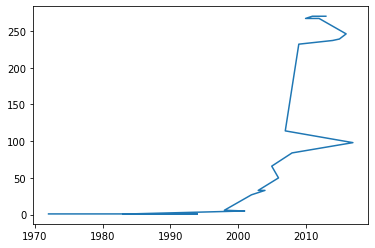

In [36]:
plt.plot(count_talk)

> points are plotted and connected in the order you give them to pandas

#### Question 4.5. Please sort the index before plotting

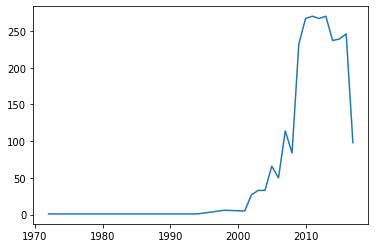

In [37]:
count_talk = exercise1["film_date"].dt.year.value_counts().sort_index()
plt.plot(count_talk)

> Check your data to understand more about what this means :)

In [38]:
exercise1.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

> Do note that we only have partial data for 2017

Before we move forward, please consider the following:

- Read the documentation of your dataset
- Use the datetime data type for dates and times
- Check your work as you proceed
- Exclude data if it might not be relevant to your focal point of analysis

### Question 5.1. What were the "best" events in TED talks' history to attend? Let's count the number of talks (great if you value variety, but they may not be great talks)

In [39]:
exercise1["event"].value_counts()

TED2014                   84
TED2009                   83
TED2016                   77
TED2013                   77
TED2015                   75
                          ..
TEDxVirginiaTech           1
TEDSalon London 2009       1
TEDxLinnaeusUniversity     1
TEDxCannes                 1
TEDxPittsburgh             1
Name: event, Length: 355, dtype: int64

#### Question 5.2. Let's use `views` as a proxy for `quality of talk`

In [40]:
exercise1["views"]

0       47227110
1        3200520
2        1636292
3        1697550
4       12005869
          ...   
2545      450430
2546      417470
2547      375647
2548      419309
2549      391721
Name: views, Length: 2550, dtype: int64

#### Question 5.3. Let's find the largest values, but we don't know how many talks are being averaged

In [41]:
exercise1.groupby("event")["views"].mean().sort_values()

event
The Do Lectures             112321.0
TEDxIslay                   120274.0
TEDxWaterloo                138812.0
AORN Congress               149818.0
TEDxNASA@SiliconValley      155895.0
                             ...    
TEDxNorrkoping             6569493.0
TEDxCreativeCoast          8444981.0
TEDxBloomington            9484259.5
TEDxHouston               16140250.5
TEDxPuget Sound           34309432.0
Name: views, Length: 355, dtype: float64

#### Question 5.4. Let's show the number of talks along with the mean (events with the highest means had only 1 or 2 talks)

In [42]:
exercise1.groupby("event").views.agg(["count","mean"]).sort_values("mean")

,count,mean
event,,
The Do Lectures,1,112321.0
TEDxIslay,1,120274.0
TEDxWaterloo,1,138812.0
AORN Congress,1,149818.0
TEDxNASA@SiliconValley,1,155895.0
...,...,...
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5


#### Question 5.5. Let's calculate the total views per event

In [43]:
exercise1.groupby("event").views.agg(["count","mean", "sum"]).sort_values("sum")

,count,mean,sum
event,,,
The Do Lectures,1,1.123210e+05,112321
TEDxIslay,1,1.202740e+05,120274
TEDxWaterloo,1,1.388120e+05,138812
AORN Congress,1,1.498180e+05,149818
TEDxNASA@SiliconValley,1,1.558950e+05,155895
...,...,...,...
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736


> #### <font color = "blue"> As you have seen, please... </font>

- Think creatively for how you can use the data you have to answer your question
- Watch out for small sample sizes

### Now, let's take a look at ratings data

> Previously, users could tag talks on the TED website (funny, inspiring, confusing, etc.)

In [44]:
exercise1.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments per view,view per comments,film_datetime
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443,2006-02-25


> Think about `two ways` to examine the ratings data for the first talk

In [45]:
exercise1.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [46]:
exercise1.loc[0, "ratings"]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

> Okay, this is a string not a list.

In [48]:
type(exercise1.ratings[0])

str

### Let's convert this into something useful using Python's `ast` module (`Abstract Syntax Tree`)

> `literal_eval()` allows you to evaluate a string containing a Python literal or container

> #### <font color = "red"> See below for my guidance </font>

In [49]:
import ast

```python
# if you wish to unpack data
    YOUR_DF["variable"].apply(ast.literal_eval)

# if you wish to access specific talk related data
    YOUR_DF["variable"].apply(ast.literal_eval)[0]

# if you wish to access specific talk related observations within the data
    YOUR_DF["variable"].apply(ast.literal_eval)[0][0]

# if you wish to access specific talk related observations with a particular attribute within the data
    YOUR_DF["variable"].apply(ast.literal_eval)[0][0]["key"]
```

> If you have a string representation of something, you can retrieve what it actually represents

In [50]:
ast.literal_eval(exercise1.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

> Let's unpack the ratings data for the first talk

In [51]:
type(ast.literal_eval(exercise1.ratings[0]))

list

> Yes, now we have a list (of dictionaries)

### Question 6. Let's define a function to convert an element in the ratings Series from string to list

#### <font color = "blue"> USE `ast.literal_eval()` </font>

In [52]:
def string_to_list(rating_str):
    return ast.literal_eval(rating_str)

> Let's test our function

In [53]:
exercise1["ratings"][0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [54]:
string_to_list(exercise1["ratings"][0]) # 第一组字节转成list

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

> Note that Series `apply` method applies a function to every element in a Series, returning a Series.

In [55]:
exercise1.ratings.apply(string_to_list)[0] # 很多组list选第一组list

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

> #### <font color = "blue"> `lambda` is a shorter alternative</blue>

> #### <font color = "red">Please check the following for more details</font>
> - `Coder's Apprentice`
    - *Chapter 8*: Functions
        - *Section 6*: Anonymous functions

In [56]:
exercise1["ratings_list"] = exercise1.ratings.apply(lambda x: ast.literal_eval(x))
exercise1["ratings_list"]

0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
                              ...                        
2545    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2546    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2548    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2549    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings_list, Length: 2550, dtype: object

> An even shorter alternative is to apply the function directly (without lambda)

In [58]:
type(exercise1["ratings_list"][0])

list

> Let's check that the new Series looks as expected

In [59]:
exercise1["ratings_list"][0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

> Each element in the Series is a list

> data type of the new Series is object

##### Note that object is not just for strings.

In [60]:
exercise1.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date             datetime64[ns]
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date        datetime64[ns]
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments per view            float64
view per comments            float64
film_datetime         datetime64[ns]
ratings_list                  object
dtype: object

#### <font color = "blue"> So far so good, remember to: </font>

- Pay attention to data types in pandas
- Use apply any time it is necessary

### Question 7.1. Let's have a look at the total number of ratings received by each talk

- for each talk, calculate the percentage of ratings that were negative

- for each talk, calculate the average number of ratings it received per day since it was published

> Let's start by building a simple function

> Here, expected result (for each talk) is sum of count

In [61]:
def extract_number_of_ratings(list_of_dicts):
    return list_of_dicts[0]

#### Question 7.2. Please pass it a list, and it returns the first element in the list, which is a dictionary

In [62]:
extract_number_of_ratings(exercise1.ratings_list[0])

{'id': 7, 'name': 'Funny', 'count': 19645}

#### Question 7.3. Let's modify the function to return the vote count.

In [63]:
## method 1 def function
def extract_number_of_ratings(list_of_dicts):
    return list_of_dicts[0]["count"]

#### Quesion 7.4. Let's pass it a list, and it returns a value from the first dictionary in the list

In [64]:
## method 1 def function
extract_number_of_ratings(exercise1.ratings_list[0])

19645

#### Question 7.5. Let's modify the function to get the sum of count

In [65]:
## method 1 def function
def extract_number_of_ratings(list_of_dicts):
    count = 0
    for d in list_of_dicts:
        count = count + d["count"]
    
    return count

> Does the result look about right? Please check.

In [66]:
## method 1 def function
extract_number_of_ratings(exercise1.ratings_list[0])

93850

> Let's apply it to every element in the Series

In [67]:
exercise1.ratings_list.apply(extract_number_of_ratings) # dataframe里每行都 分别 用这个函数

0       93850
1        2936
2        2824
3        3728
4       25620
        ...  
2545      192
2546      151
2547      136
2548      583
2549      142
Name: ratings_list, Length: 2550, dtype: int64

> #### <font color = "blue"> Alternative here is to use a `generator expression`</font>

> #### <font color = "red"> Please check the following for more details </font>
> - `Think Python`: https://greenteapress.com/thinkpython2/thinkpython2.pdf
    - *Chapter 19*: The Goodies
        - *Section 3*: Generator expressions

In [68]:
sum(i["count"] for i in exercise1.ratings_list[0])

93850

> Try to use `lambda` to apply this method

In [69]:
exercise1.ratings_list.apply(lambda x: sum(d["count"] for d in x))

0       93850
1        2936
2        2824
3        3728
4       25620
        ...  
2545      192
2546      151
2547      136
2548      583
2549      142
Name: ratings_list, Length: 2550, dtype: int64

> Another alternative is to use `pd.DataFrame()`

In [70]:
pd.DataFrame(exercise1.ratings_list[0])["count"].sum()

93850

> use `lambda` to apply this method

In [71]:
exercise1.ratings_list.apply(lambda x: pd.DataFrame(x)["count"].sum())

0       93850
1        2936
2        2824
3        3728
4       25620
        ...  
2545      192
2546      151
2547      136
2548      583
2549      142
Name: ratings_list, Length: 2550, dtype: int64

> Things to consider:

- Write your code in small chunks

- Check your work as you move forward

- `lambda` is best for simple functions

In [78]:
exercise1["number_of_ratings"] = exercise1.ratings_list.apply(extract_number_of_ratings)
exercise1.sample(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,comments per view,view per comments,film_datetime,ratings_list,number_of_ratings
2471,65,"A few days before she turned 61, writer Anne L...",955,TED2017,2017-04-24,16,Anne Lamott,Anne Lamott: 12 truths I learned from life and...,1,2017-06-09 15:06:36,...,"Novelist, essayist","['Christianity', 'God', 'aging', 'art', 'beaut...",12 truths I learned from life and writing,https://www.ted.com/talks/anne_lamott_12_truth...,1890978,0.000034,29091.969231,2017-04-24,"[{'id': 26, 'name': 'Obnoxious', 'count': 27},...",2057


### Let's find: 
#### ***which occupations deliver the funniest TED talks on average?***

- for each talk, calculate the most frequent rating
- for each talk, clean the occupation data so that there's only one occupation per talk

##### You might want to count the number of funny ratings

In [74]:
exercise1.ratings_list.head(1)

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
Name: ratings_list, dtype: object

> "Funny" is not always the first dictionary in the list.

#### Please check ratings (not ratings_list) to see if "Funny" is always a rating type

In [75]:
exercise1.ratings.str.contains("Funny").value_counts()

True    2550
Name: ratings, dtype: int64

### Question 8. Let's write a custom function that gives us a `dictionary` that lists `talks` containing `funny` rating.

In [76]:
def extract_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d["name"] == "Funny":
            return d["count"]

> Then, you might want to examine a record in which "Funny" is not the first dictionary

In [79]:
exercise1.ratings_list[96]

[{'id': 3, 'name': 'Courageous', 'count': 3236},
 {'id': 21, 'name': 'Unconvincing', 'count': 539},
 {'id': 1, 'name': 'Beautiful', 'count': 399},
 {'id': 2, 'name': 'Confusing', 'count': 86},
 {'id': 7, 'name': 'Funny', 'count': 1203},
 {'id': 9, 'name': 'Ingenious', 'count': 663},
 {'id': 11, 'name': 'Longwinded', 'count': 192},
 {'id': 8, 'name': 'Informative', 'count': 1113},
 {'id': 10, 'name': 'Inspiring', 'count': 2935},
 {'id': 22, 'name': 'Fascinating', 'count': 934},
 {'id': 24, 'name': 'Persuasive', 'count': 2475},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 551},
 {'id': 26, 'name': 'Obnoxious', 'count': 406},
 {'id': 25, 'name': 'OK', 'count': 172}]

> Let's check that the function works.

In [80]:
extract_funny_ratings(exercise1.ratings_list[96])

1203

> Let's apply it to every element in the Series.

In [81]:
exercise1.head(1)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,views,comments per view,view per comments,film_datetime,ratings_list,number_of_ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,...,Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",93850


In [82]:
exercise1["funny_ratings"] = exercise1.ratings_list.apply(extract_funny_ratings)

> Do check for `missing values`.

In [83]:
exercise1.funny_ratings.isna().sum()

0

##### Now, let's calculate the percentage of ratings that are funny

In [84]:
exercise1["funny_percentage"] = exercise1.funny_ratings / exercise1.number_of_ratings

> Let's do some "gut check" here that this calculation makes sense by examining the occupations of the funniest talks

In [85]:
exercise1.sort_values("funny_percentage").speaker_occupation

2549                  Game designer
1612                      Biologist
612                        Sculptor
998                  Penguin expert
593                        Engineer
                   ...             
2114            Comedian and writer
173                        Investor
747                        Comedian
1398                       Comedian
685     Actor, comedian, playwright
Name: speaker_occupation, Length: 2550, dtype: object

> Let's examine the occupations of the least funny talks.

In [90]:
exercise1.groupby("speaker_occupation").funny_percentage.mean().sort_values().head()

speaker_occupation
 Chairman of the Cordoba Initiative    0.0
Political scientist and journalist     0.0
HIV/AIDS fighter                       0.0
Author, thinker                        0.0
Aid worker                             0.0
Name: funny_percentage, dtype: float64

### Question 9. It would be funny (pun inteded here) to analyze the funny rate by occupation :) Let's calculate the mean funny rate for each job.

In [89]:
exercise1.groupby("speaker_occupation").funny_percentage.mean().sort_values().tail()

speaker_occupation
Comedian                       0.512457
Actor, writer                  0.515152
Actor, comedian, playwright    0.558107
Jugglers                       0.566828
Comedian and writer            0.602085
Name: funny_percentage, dtype: float64

##### Note that most of the occupations have a sample size of 1

In [91]:
exercise1.speaker_occupation.value_counts()

Writer                                                                    45
Designer                                                                  34
Artist                                                                    34
Journalist                                                                33
Entrepreneur                                                              31
                                                                          ..
Principal Investigator and Director of the Open Agriculture Initiative     1
Cybercrime fighter                                                         1
Designer and storyteller                                                   1
Human beatbox                                                              1
Farmer and technologist                                                    1
Name: speaker_occupation, Length: 1458, dtype: int64

### Question 10. Let's start looking at `occupations` that are well-represented in the dataset. Let's count how many times each job appears

In [92]:
counting_jobs = exercise1.speaker_occupation.value_counts()
counting_jobs

Writer                                                                    45
Designer                                                                  34
Artist                                                                    34
Journalist                                                                33
Entrepreneur                                                              31
                                                                          ..
Principal Investigator and Director of the Open Agriculture Initiative     1
Cybercrime fighter                                                         1
Designer and storyteller                                                   1
Human beatbox                                                              1
Farmer and technologist                                                    1
Name: speaker_occupation, Length: 1458, dtype: int64

##### `value_counts()` outputs a pandas Series, thus we can use pandas to manipulate the output

In [93]:
type(counting_jobs)

pandas.core.series.Series

##### Let's take a look at jobs which appear at least 5 times

In [94]:
counting_jobs[counting_jobs>=5]

Writer                        45
Designer                      34
Artist                        34
Journalist                    33
Entrepreneur                  31
                              ..
Chemist                        5
Paleontologist                 5
Environmentalist, futurist     5
Producer                       5
Game designer                  5
Name: speaker_occupation, Length: 68, dtype: int64

> Let's save the index of this Series

In [95]:
well_represented_jobs = counting_jobs[counting_jobs>=5].index
well_represented_jobs

Index(['Writer', 'Designer', 'Artist', 'Journalist', 'Entrepreneur',
       'Architect', 'Inventor', 'Psychologist', 'Photographer', 'Filmmaker',
       'Economist', 'Author', 'Educator', 'Neuroscientist', 'Roboticist',
       'Philosopher', 'Biologist', 'Physicist', 'Marine biologist', 'Musician',
       'Technologist', 'Global health expert; data visionary', 'Activist',
       'Graphic designer', 'Behavioral economist', 'Philanthropist',
       'Astronomer', 'Singer/songwriter', 'Poet', 'Oceanographer', 'Historian',
       'Social psychologist', 'Computer scientist', 'Novelist', 'Futurist',
       'Engineer', 'Mathematician', 'Astrophysicist', 'Social entrepreneur',
       'Legal activist', 'Reporter', 'Performance poet, multimedia artist',
       'Photojournalist', 'Evolutionary biologist', 'Singer-songwriter',
       'Writer, activist', 'Techno-illusionist', 'Climate advocate',
       'Comedian', 'Researcher', 'Social Media Theorist',
       'Investor and advocate for moral leaders

##### Now, re-analyze the funny rate by occupation (for top jobs only)

> Let's filter DataFrame to include only those jobs.

In [96]:
ted_with_jobs = exercise1[exercise1.speaker_occupation.isin(well_represented_jobs)]
ted_with_jobs

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,title,url,views,comments per view,view per comments,film_datetime,ratings_list,number_of_ratings,funny_ratings,funny_percentage
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,...,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",2936,544,0.185286
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,...,The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,20245.984823,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",25620,1390,0.054254
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,2006-02-23,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,2006-07-10 00:11:00,...,Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741,0.000048,21037.847826,2006-02-23,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...",1024,9,0.008789
11,55,Jehane Noujaim unveils her 2006 TED Prize wish...,1538,TED2006,2006-02-26,20,Jehane Noujaim,Jehane Noujaim: My wish: A global day of film,1,2006-07-25 00:11:00,...,My wish: A global day of film,https://www.ted.com/talks/jehane_noujaim_inspi...,387877,0.000142,7052.309091,2006-02-26,"[{'id': 1, 'name': 'Beautiful', 'count': 70}, ...",592,5,0.008446
14,99,"Nicholas Negroponte, founder of the MIT Media ...",1057,TED2006,2006-02-23,25,Nicholas Negroponte,Nicholas Negroponte: One Laptop per Child,1,2006-08-01 00:11:00,...,One Laptop per Child,https://www.ted.com/talks/nicholas_negroponte_...,358304,0.000276,3619.232323,2006-02-23,"[{'id': 3, 'name': 'Courageous', 'count': 83},...",781,14,0.017926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,10,"Forget quinoa. Meet fonio, an ancient ""miracle...",934,TED2017,2017-08-27,2,Pierre Thiam,Pierre Thiam: A forgotten ancient grain that c...,1,2017-09-13 14:45:42,...,A forgotten ancient grain that could help Afri...,https://www.ted.com/talks/pierre_thiam_a_forgo...,527314,0.000019,52731.400000,2017-08-27,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...",256,2,0.007812
2541,12,Physics doesn't just happen in a fancy lab -- ...,957,TEDxManchester,2017-02-19,2,Helen Czerski,Helen Czerski: The fascinating physics of ever...,1,2017-09-14 20:00:02,...,The fascinating physics of everyday life,https://www.ted.com/talks/helen_czerski_fun_ho...,656791,0.000018,54732.583333,2017-02-19,"[{'id': 11, 'name': 'Longwinded', 'count': 29}...",378,39,0.103175
2542,3,In the century-old statues that occupy Cape To...,795,TEDGlobal 2017,2017-08-27,1,Sethembile Msezane,Sethembile Msezane: Living sculptures that sta...,1,2017-09-15 15:08:13,...,Living sculptures that stand for history's truths,https://www.ted.com/talks/sethembile_msezane_l...,542088,0.000006,180696.000000,2017-08-27,"[{'id': 1, 'name': 'Beautiful', 'count': 41}, ...",181,6,0.033149
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,2017-09-19 20:00:16,...,What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,0.000038,26495.882353,2017-06-06,"[{'id': 3, 'name': 'Courageous', 'count': 24},...",192,1,0.005208


##### Let's re-do the previous groupby

In [97]:
exercise1.groupby("speaker_occupation").funny_percentage.mean().sort_values()

speaker_occupation
 Chairman of the Cordoba Initiative    0.000000
Political scientist and journalist     0.000000
HIV/AIDS fighter                       0.000000
Author, thinker                        0.000000
Aid worker                             0.000000
                                         ...   
Comedian                               0.512457
Actor, writer                          0.515152
Actor, comedian, playwright            0.558107
Jugglers                               0.566828
Comedian and writer                    0.602085
Name: funny_percentage, Length: 1458, dtype: float64

> ### <font color = "blue"> Please consider the following, when using `pandas`: </font>

- Check your assumptions about your data
- Check whether your results are reasonable
- Take advantage of the fact that pandas operations often output a DataFrame or a Series
- Watch out for small sample sizes
- Consider the impact of missing data

> ### <font color = "blue"> As you could find from me as well as from the dataset, `data scientists are relatively funny` :) </font>


### <font color="green">"Thank you for putting your efforts into the exercise problem sets :)"</font>